<a href="https://colab.research.google.com/github/gracesjy/handsonml2/blob/main/01%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 무작정 따라하기

## 1장

In [1]:
import sys
assert sys.version_info >= (3,7)

from packaging import version
import sklearn

print(sklearn.__version__)

1.2.2


In [2]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [4]:
import numpy as np
np.random.seed(42)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [6]:
X = lifesat[['GDP per capita (USD)']].values
y = lifesat[['Life satisfaction']].values

print(type(X))

<class 'numpy.ndarray'>


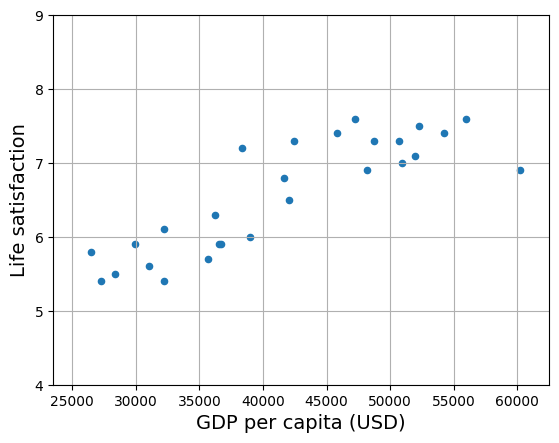

In [7]:
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)",y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

In [8]:
model = LinearRegression()
model.fit(X,y)

X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.30165767]]


## K-nn 으로 모델 변경

In [9]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)

X_new = [[37_655.2]]
print(model.predict(X_new))

[[6.33333333]]


## 이 부분은 상식 선에서 연습용으로 한번 해 보는 것

In [10]:
from pathlib import Path

IMAGES_PATH=Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [12]:
import urllib.request

datapath=Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = data_root + "lifesat/" + filename
    urllib.request.urlretrieve(url, datapath / filename)


In [48]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv",thousands=',')

In [49]:
oecd_bli['Indicator'].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [50]:
gdp_per_capita.columns

Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')

In [51]:
gdp_year = 2020
gdppc_col = 'GDP per capita (USD)'
lifesat_col = 'Life satisfaction'
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita['Year'] == gdp_year]
gdp_per_capita.head(3)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913


In [52]:
gdp_per_capita = gdp_per_capita.drop(['Code','Year'], axis=1)
gdp_per_capita.head(3)

,Entity,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,1978.961579
49,Africa Eastern and Southern,3387.594670
80,Africa Western and Central,4003.158913


In [53]:
gdp_per_capita.columns = ['Country','GDP']
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

,GDP
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [54]:
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN


In [57]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head(3)

KeyError: 'INEQUALITY'

In [56]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.head()
full_country_stats.sort_values(by='GDP', inplace=True)
full_country_stats.head()
full_country_stats = full_country_stats([['GDP', lifesat_col]])
full_country_stats.head(3)

TypeError: 'DataFrame' object is not callable